In [19]:
#Read CNBC Data and drop duplicates

import pandas as pd
cnbc_data = pd.read_csv('articles1.csv')
cnbc_data.shape
cnbc_data = cnbc_data.drop_duplicates()
cnbc_data.reset_index(drop=True, inplace=True)
cnbc_data.shape
cnbc_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,51,17342,Tech Giants Seem Invincible. That Worries Lawm...,New York Times,Farhad Manjoo,2017-01-05,2017,1,NaN,"In the technology industry, the sharks have ne..."
1,84,17383,"The 2017 Class Divide, as Dissected by a New ‘...",New York Times,James Poniewozik,2017-01-04,2017,1,NaN,"In the first episode of “One Day at a Time,” N..."
2,96,17395,Sears Agrees to Sell Craftsman to Stanley Blac...,New York Times,Michael J. de la Merced,2017-01-06,2017,1,NaN,The question from the analyst on Thursday was ...
3,99,17398,"Macy’s Will Cut 10,000 Jobs After Poor Holiday...",New York Times,Christopher Mele,2017-01-04,2017,1,NaN,Struggling with sagging sales over another cru...
4,138,17443,The Major Potential Impact of a Corporate Tax ...,New York Times,Neil Irwin,2017-01-07,2017,1,NaN,The United States system for taxing businesses...


In [16]:
#extract number of words in each article
cnbc_data['word_count'] = cnbc_data['content'].apply(lambda x: len(str(x).split(" ")))
cnbc_data[['content','word_count']].head()

,content,word_count
0,"In the technology industry, the sharks have ne...",1324
1,"In the first episode of “One Day at a Time,” N...",1244
2,The question from the analyst on Thursday was ...,751
3,Struggling with sagging sales over another cru...,523
4,The United States system for taxing businesses...,1249


In [17]:
#extract number of characters in each article
cnbc_data['char_count'] = cnbc_data['content'].str.len() ## this also includes spaces
cnbc_data[['content','char_count']].head()

,content,char_count
0,"In the technology industry, the sharks have ne...",7701
1,"In the first episode of “One Day at a Time,” N...",6847
2,The question from the analyst on Thursday was ...,4351
3,Struggling with sagging sales over another cru...,2967
4,The United States system for taxing businesses...,7203


In [18]:
#find average word length in each article
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

cnbc_data['avg_word'] = cnbc_data['content'].apply(lambda x: avg_word(x))
cnbc_data[['content','avg_word']].head()

,content,avg_word
0,"In the technology industry, the sharks have ne...",4.982812
1,"In the first episode of “One Day at a Time,” N...",4.941799
2,The question from the analyst on Thursday was ...,4.953232
3,Struggling with sagging sales over another cru...,4.766082
4,The United States system for taxing businesses...,4.897204


In [20]:


import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
stop = stopwords.words('english')

cnbc_data['stopwords'] = cnbc_data['content'].apply(lambda x: len([x for x in x.split() if x in stop]))
cnbc_data[['content','stopwords']].head()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


,content,stopwords
0,"In the technology industry, the sharks have ne...",485
1,"In the first episode of “One Day at a Time,” N...",393
2,The question from the analyst on Thursday was ...,265
3,Struggling with sagging sales over another cru...,198
4,The United States system for taxing businesses...,465


In [21]:
import os
os.getcwd()

'C:\\Users\\Fatima'

In [21]:

import nltk
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [22]:
#Check hashtags
cnbc_data['hastags'] = cnbc_data['content'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
cnbc_data[['content','hastags']].head()

,content,hastags
0,"In the technology industry, the sharks have ne...",0
1,"In the first episode of “One Day at a Time,” N...",0
2,The question from the analyst on Thursday was ...,0
3,Struggling with sagging sales over another cru...,0
4,The United States system for taxing businesses...,0


In [23]:
#Check numbers
cnbc_data['numerics'] = cnbc_data['content'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
cnbc_data[['content','numerics']].head()

,content,numerics
0,"In the technology industry, the sharks have ne...",2
1,"In the first episode of “One Day at a Time,” N...",0
2,The question from the analyst on Thursday was ...,12
3,Struggling with sagging sales over another cru...,19
4,The United States system for taxing businesses...,3


In [24]:
#Check Upper Case

cnbc_data['upper'] = cnbc_data['content'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
cnbc_data[['content','upper']].head()

,content,upper
0,"In the technology industry, the sharks have ne...",13
1,"In the first episode of “One Day at a Time,” N...",19
2,The question from the analyst on Thursday was ...,2
3,Struggling with sagging sales over another cru...,7
4,The United States system for taxing businesses...,13


In [25]:
#convert to lower case
cnbc_data['content'] = cnbc_data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
cnbc_data['content'].head()

0    in the technology industry, the sharks have ne...
1    in the first episode of “one day at a time,” n...
2    the question from the analyst on thursday was ...
3    struggling with sagging sales over another cru...
4    the united states system for taxing businesses...
Name: content, dtype: object

In [26]:
#remove punctuation
cnbc_data['content'] = cnbc_data['content'].str.replace('[^\w\s]','')
cnbc_data['content'].head()

0    in the technology industry the sharks have nev...
1    in the first episode of one day at a time netf...
2    the question from the analyst on thursday was ...
3    struggling with sagging sales over another cru...
4    the united states system for taxing businesses...
Name: content, dtype: object

In [27]:
#most occuring words
freq = pd.Series(' '.join(cnbc_data['content']).split()).value_counts()[:10]
freq


the     63263
to      31021
of      29442
and     27942
a       27751
in      23366
that    14453
for     11518
is      10957
on       9088
dtype: int64

In [28]:
#remove most occuring words(no use)
freq = list(freq.index)
cnbc_data['content'] = cnbc_data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
cnbc_data['content'].head()


0    technology industry sharks have never long bee...
1    first episode one day at time netflixs reboot ...
2    question from analyst thursday was delicate en...
3    struggling with sagging sales over another cru...
4    united states system taxing businesses mess if...
Name: content, dtype: object

In [29]:
#low freuency words
freq = pd.Series(' '.join(cnbc_data['content']).split()).value_counts()[-10:]
freq

soapmakers    1
townhouse     1
bianco        1
abounded      1
dawns         1
gorges        1
cabelas       1
shoreditch    1
recluse       1
dawned        1
dtype: int64

In [30]:
#remove low frequency words
freq = list(freq.index)
cnbc_data['content'] = cnbc_data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
cnbc_data['content'].head()

0    technology industry sharks have never long bee...
1    first episode one day at time netflixs reboot ...
2    question from analyst thursday was delicate en...
3    struggling with sagging sales over another cru...
4    united states system taxing businesses mess if...
Name: content, dtype: object

In [31]:
#stemming applying to first five only
from nltk.stem import PorterStemmer
st = PorterStemmer()
cnbc_data['content'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    technolog industri shark have never long been ...
1    first episod one day at time netflix reboot no...
2    question from analyst thursday wa delic enough...
3    struggl with sag sale over anoth crucial holid...
4    unit state system tax busi mess if there one t...
Name: content, dtype: object

In [5]:
#Lemmatization
from textblob import TextBlob
from textblob import Word
#cnbc_data['content'] = cnbc_data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#cnbc_data['content'].head()

In [33]:
#N-grams 
TextBlob(cnbc_data['content'][0]).ngrams(2)


[WordList(['technology', 'industry']),
 WordList(['industry', 'shark']),
 WordList(['shark', 'have']),
 WordList(['have', 'never']),
 WordList(['never', 'long']),
 WordList(['long', 'been']),
 WordList(['been', 'safe']),
 WordList(['safe', 'from']),
 WordList(['from', 'minnow']),
 WordList(['minnow', 'over']),
 WordList(['over', 'much']),
 WordList(['much', 'last']),
 WordList(['last', '40']),
 WordList(['40', 'year']),
 WordList(['year', 'biggest']),
 WordList(['biggest', 'player']),
 WordList(['player', 'tech']),
 WordList(['tech', 'from']),
 WordList(['from', 'ibm']),
 WordList(['ibm', 'cisco']),
 WordList(['cisco', 'yahoo']),
 WordList(['yahoo', 'were']),
 WordList(['were', 'eventually']),
 WordList(['eventually', 'outmaneuvered']),
 WordList(['outmaneuvered', 'by']),
 WordList(['by', 'came']),
 WordList(['came', 'out']),
 WordList(['out', 'nowhere']),
 WordList(['nowhere', 'dynamic']),
 WordList(['dynamic', 'so']),
 WordList(['so', 'dependable']),
 WordList(['dependable', 'it']),


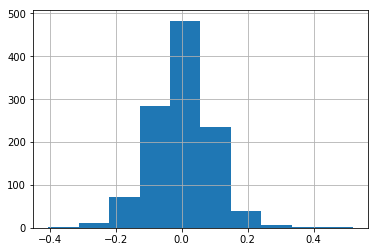

In [34]:
import matplotlib.pyplot as plt
cnbc_data['sentiment'] = cnbc_data['content'].apply(lambda x: TextBlob(x).sentiment[0] )
cnbc_data[['content','sentiment']].head(10)
plt.figure();
cnbc_data['sentiment'].diff().hist()



In [47]:

df = pd.DataFrame(cnbc_data[['content','sentiment']])
dfWith2Std = df[df['sentiment']>df['sentiment'].std()*2].dropna()

In [48]:
dfWith2Std

,content,sentiment
7,good morning here what you need know president...,0.133852
9,be woman united state feel unequal despite gre...,0.141630
21,bad news had been building month at metropolit...,0.168567
24,nondescript office building west 39th street b...,0.161837
32,being part global billionaire class beyond ima...,0.131564
34,when nathan kecy graduated from plymouth state...,0.157802
36,malmo sweden it ha been only three year since ...,0.147570
37,there are more than 160 swear word andy weir t...,0.139006
44,president trump address joint session congress...,0.189787
51,over last few week it seemed like neiman marcu...,0.159743


In [51]:
dfWith3Std

,content,sentiment
57,hong kong it not every day you get take selfie...,0.211461
68,many people seek an easy formula choosing bett...,0.200721
154,they were musician poet educator baristas peop...,0.206714
228,new york offer some world most famous store bu...,0.261040
254,from newly installed gold drape oval office go...,0.234343
264,first lady melania trump small hometown centra...,0.222917
275,oculus rift demonstrating vr headset are shutt...,0.247429
296,alibaba massive chinese online retailer compet...,0.291905
301,ivanka trump line woman fragrance ha soared nu...,0.237500
312,what first lady melania trump first daughter i...,0.212947


In [69]:
import scipy.stats as stats
k,p=stats.normaltest(cnbc_data[['sentiment']])
#alpha = 1e-3
#print('p = {:g}'.format(p))


In [67]:
alpha = 0.05
if p < alpha: 
    print("Not normal")
else:
    print("Normal")


Not normal


In [78]:
df=cnbc_data['sentiment'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

import scipy.stats as stats
k,p=stats.normaltest(df)
alpha = 0.05
if p < alpha: 
    print("Not normal")
else:
    print("Normal")

Normal


C:\Users\Fatima\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Fatima\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Fatima\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Fatima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1404: RuntimeWarning: invalid value encountered in less
  term2 = np.where(denom < 0, term1, np.power((1-2.0/A)/denom, 1/3.0))


In [98]:

import pandas as pd
df = pd.read_csv('article1.csv')
df.shape

(305, 11)

In [89]:
df

,id,author,body,description,title,pub_date,url,image_url,impact,category_id
0,1,Max Mason,Optus and SBS shared the Socceroos match versu...,Optus is running the ruler over bids for more ...,"Optus could pounce on Bundesliga, La Liga and ...",2018-06-17 21:13:46,https://www.afr.com/business/media-and-marketi...,https://www.afr.com/content/dam/images/g/w/9/9...,0.0,1
1,2,John Stensholt,Share on twitter John Stensholt by Wondering w...,Cuts to SBS in the 2014 Budget are now showing...,How Tony Abbott paved the way for the SBS-Optu...,2018-06-17 13:00:00,https://www.afr.com/business/sport/how-tony-ab...,https://www.afr.com/content/dam/images/h/1/1/h...,0.0,1
2,3,Emma Connors,Share on twitter Emma Connors by Microsoft pre...,Microsoft president Brad Smith has a big ambit...,Microsoft president Brad Smith wants to save t...,2018-06-15 12:42:00,https://www.afr.com/afr-special/microsoft-pres...,https://www.afr.com/content/dam/images/h/0/z/3...,0.0,1
3,4,Tom Uren,Tom Uren by The Chinese government has conduct...,by Tom Uren. The Chinese government has conduc...,The reasons why Huawei is too great a 5G risk,2018-06-15 12:42:00,https://www.afr.com/opinion/columnists/the-tec...,https://www.afr.com/content/dam/images/h/0/j/1...,0.0,1
4,5,James Eyers,by\n\nJames Eyers\n\nPaul Smith Commonwealth B...,The bank's IT expenses shot up 31 per cent las...,CBA faces heat over cyber security cuts and co...,2018-06-14 16:51:00,https://www.afr.com/technology/cba-faces-heat-...,https://www.afr.com/content/dam/images/g/t/4/7...,0.0,1
5,6,Hillary Hoffower,You can cut your grocery bill by up to 50%. Jo...,The grocery store can really eat up a budget —...,The only right way to save money on groceries,2018-06-18 13:05:00,http://www.businessinsider.com/how-to-save-mon...,https://amp.businessinsider.com/images/5b242ea...,0.0,1
6,7,Matt Weinberger,Microsoft CEO Satya Nadella Robert Galbraith/R...,"Microsoft has acquired Flipgrid, an educationa...",Microsoft buys a classroom video startup with ...,2018-06-18 13:00:00,http://www.businessinsider.com/microsoft-flipg...,https://amp.businessinsider.com/images/5718211...,0.0,1
7,8,Richard Feloni and Myelle Lansat,Sam Yagan was born in the United States after ...,Sam Yagan was born in the United States after ...,The cofounder of OKCupid says immigration is '...,2018-06-18 12:54:00,http://www.businessinsider.com/okcupid-sam-yag...,https://amp.businessinsider.com/images/5b16d8f...,0.0,1
8,9,Ben Gilbert,Nintendo/Disney\n\nNintendo and Disney are mas...,Disney and Nintendo are collaborating on a new...,Nintendo and Disney are creating a show dedica...,2018-06-18 12:51:31,http://www.businessinsider.com/nintendo-disney...,https://amp.businessinsider.com/images/5b27a8b...,0.0,1
9,10,"stevenjohn23@gmail.com (Steven John), Steven John",The Insider Picks team writes about stuff we t...,The Insider Picks team writes about stuff we t...,I got my newborn daughter a play gym that help...,2018-06-18 12:30:00,http://www.businessinsider.com/lovevery-baby-p...,https://amp.businessinsider.com/images/5b26946...,0.0,1


In [101]:
df_agri=df.loc[df['category_id'] ==2]
    
df_agri

,id,author,body,description,title,pub_date,url,image_url,impact,category_id,category
18,19,Business Insider Nordic,Patrick Pleul / AP Photo / TT\n\nCash circulat...,Flickr/Peter Trimming Cash circulation is in s...,Bank robberies decline as Sweden ditches cash ...,2018-06-18 10:57,https://nordic.businessinsider.com/sweden-is-d...,https://amp.businessinsider.com/images/5b27768...,0,2,Agriculture
52,53,Rachel Gillett,Being an active father impacts your success in...,Being an active father impacts your success in...,9 scientific ways being a father affects your ...,2018-06-17 21:56,http://www.businessinsider.com/how-being-a-dad...,http://static6.businessinsider.com/image/5b22d...,0,2,Agriculture
72,73,Erin Brodwin,Shutterstock\n\nChange is coming for a small b...,Change is coming for a small but blooming corn...,There’s a sea change coming for the $1 billion...,2018-06-17 15:00,http://www.businessinsider.com/marijuana-cbd-b...,https://amp.businessinsider.com/images/5a456df...,0,2,Agriculture
77,78,Hollis Johnson and Kate Taylor,Applebee's is aiming for a comeback. Hollis Jo...,Applebee's is gunning for a comeback after a s...,We visited Applebee's as the chain tries to cl...,2018-06-17 14:20,http://www.businessinsider.com/applebees-2-for...,https://amp.businessinsider.com/images/5b22bdd...,0,2,Agriculture
100,101,Matthew DeBord,A rendering of the revived Central Station. Fo...,Ford has developed a massive development plan ...,Ford CEO Jim Hackett reveals details about how...,2018-06-17 4:01,http://www.businessinsider.com/how-ford-ceo-ji...,https://amp.businessinsider.com/images/5a55463...,0,2,Agriculture
109,110,Claire Zillman,"• Hitting the maternal wall. In July 2014, I w...",The Broadsheet for June 18.,"Elizabeth Holmes, Oprah’s Apple Deal, Pregnanc...",2018-06-18 11:51,http://fortune.com/2018/06/18/elizabeth-holmes...,https://fortunedotcom.files.wordpress.com/2017...,0,2,Agriculture
125,126,Bloomberg,Clothing designer-retailer Perry Ellis Interna...,Investors will get $27.50 a share in cash.,Perry Ellis to Be Taken Private in $437 Millio...,2018-06-16 17:04,http://fortune.com/2018/06/16/perry-ellis-take...,https://fortunedotcom.files.wordpress.com/2018...,0,2,Agriculture
132,133,Jaclyn Gallucci,Geoffrey the Giraffe has gone from the morgue ...,Geoffrey the Giraffe has gone from the morgue ...,"Toys ‘R’ Us Mascot, Orphaned by Bankruptcy, Fi...",2018-06-16 14:05,http://fortune.com/2018/06/16/toys-r-us-geoffr...,https://fortunedotcom.files.wordpress.com/2018...,0,2,Agriculture
134,135,Jaclyn Gallucci,Samsung Electronics Co. was told to pay $400 m...,Samsung pledged to appeal.,Samsung Told to Pay $400 Million in FinFet Pat...,2018-06-16 13:39,http://fortune.com/2018/06/16/samsung-finfet-p...,https://fortunedotcom.files.wordpress.com/2017...,0,2,Agriculture
138,139,Glenn Fleishman,Breakfast is the most important meal of the da...,With the disease flourishing in the food suppl...,Salmonella Outbreaks: How to Tell If Your Hone...,2018-06-16 0:29,http://fortune.com/2018/06/15/how-to-tell-salm...,https://fortunedotcom.files.wordpress.com/2018...,0,2,Agriculture


In [ ]:
df_agri

In [38]:
#import matplotlib.pyplot as plt
cnbc_data['sentiment'] = cnbc_data['content'].apply(lambda x: TextBlob(x).sentiment[0] )
cnbc_data['sentiment']
#df_agri[['body','sentiment']].head(10)
#plt.figure();
#df_agri['sentiment'].diff().hist()



0       0.120292
1       0.118616
2       0.048356
3       0.015431
4       0.086285
5       0.076576
6       0.102945
7       0.136194
8       0.039975
9       0.132485
10      0.067023
11      0.079201
12      0.104126
13      0.093366
14      0.082261
15      0.088087
16      0.078512
17      0.111454
18      0.098141
19      0.112540
20      0.113876
21      0.173616
22      0.077643
23      0.072381
24      0.157322
25      0.124758
26      0.080835
27      0.058500
28      0.116487
29      0.103202
          ...   
1107    0.048921
1108    0.097796
1109    0.078282
1110    0.074321
1111   -0.041667
1112    0.057128
1113    0.117373
1114    0.125902
1115    0.133222
1116    0.091597
1117    0.204762
1118    0.061776
1119    0.034904
1120    0.045506
1121    0.016746
1122    0.011121
1123    0.102404
1124    0.068775
1125    0.150453
1126    0.033717
1127    0.142622
1128    0.030159
1129    0.135990
1130    0.125798
1131    0.006894
1132    0.100268
1133    0.114905
1134    0.1087

In [128]:
import scipy.stats as stats
k,p=stats.normaltest(df_agri[['sentiment']])
#alpha = 1e-3
#print('p = {:g}'.format(p))


alpha = 0.05
if p < alpha: 
    print("Not normal")
else:
    print("Normal")


Normal


In [135]:
#dfWith3Std = df_agri[df_agri['sentiment']>df_agri['sentiment'].std()*3].dropna()

#dfWith3Std = df_agri[df_agri['sentiment']>df_agri['sentiment'].mean()+df_agri['sentiment'].std()*(2)].dropna()

#dfWith3Std = df_agri[df_agri['sentiment']<-df_agri['sentiment'].mean()-df_agri['sentiment'].std()*(2)].dropna()


dfWith3Std = df_agri[df_agri['sentiment']<-df_agri['sentiment'].mean()-df_agri['sentiment'].std()*(1.645)].dropna()
#dfWith3Std = df_agri[df_agri['sentiment']<-df_agri['sentiment'].mean()-df_agri['sentiment'].std()*(1.96)].dropna()



In [136]:
dfWith3Std

,id,author,body,description,title,pub_date,url,image_url,impact,category_id,category,sentiment


In [107]:
dfWith2Std= df_agri[df_agri['sentiment']>df_agri['sentiment'].std()*2].dropna()

In [108]:
dfWith2Std

,id,author,body,description,title,pub_date,url,image_url,impact,category_id,category,sentiment
52,53,Rachel Gillett,Being an active father impacts your success in...,Being an active father impacts your success in...,9 scientific ways being a father affects your ...,2018-06-17 21:56,http://www.businessinsider.com/how-being-a-dad...,http://static6.businessinsider.com/image/5b22d...,0,2,Agriculture,0.195367
109,110,Claire Zillman,"• Hitting the maternal wall. In July 2014, I w...",The Broadsheet for June 18.,"Elizabeth Holmes, Oprah’s Apple Deal, Pregnanc...",2018-06-18 11:51,http://fortune.com/2018/06/18/elizabeth-holmes...,https://fortunedotcom.files.wordpress.com/2017...,0,2,Agriculture,0.178154
138,139,Glenn Fleishman,Breakfast is the most important meal of the da...,With the disease flourishing in the food suppl...,Salmonella Outbreaks: How to Tell If Your Hone...,2018-06-16 0:29,http://fortune.com/2018/06/15/how-to-tell-salm...,https://fortunedotcom.files.wordpress.com/2018...,0,2,Agriculture,0.269462
176,177,Alan Barber,As the birth of my first child neared earlier ...,Trump's policy would let new parents borrow fr...,Ivanka Trump’s Paid Leave Policy Would Be Disa...,2018-06-15 13:00,http://fortune.com/2018/06/15/ivanka-trump-mar...,https://fortunedotcom.files.wordpress.com/2018...,0,2,Agriculture,0.178632
184,185,Natasha Bach,"Kentucky is suing Walgreens (wba), accusing th...","The lawsuit claims that the crisis was ""man-ma...",Why Kentucky Is Suing Walgreens Over the Opioi...,2018-06-15 9:46,http://fortune.com/2018/06/15/kentucky-walgree...,https://fortunedotcom.files.wordpress.com/2016...,0,2,Agriculture,0.189586
196,197,Kevin Kelleher,John Mackey isn’t afraid to “speak truth to po...,"'I ultimately am not afraid to get fired,' Joh...",Whole Foods CEO Says He’s Not Afraid to ‘Speak...,2018-06-14 21:57,http://fortune.com/2018/06/14/whole-foods-ceo-...,https://fortunedotcom.files.wordpress.com/2015...,0,2,Agriculture,0.199304
206,207,Lorie Konish,Many investors who are just starting out grapp...,Here's what higher interest rates mean for you...,How to play rising interest rates based on you...,2018-06-18 13:00,https://www.cnbc.com/2018/06/18/how-to-play-ri...,https://fm.cnbc.com/applications/cnbc.com/reso...,0,2,Agriculture,0.203065
207,208,Megan Leonhardt,Prince Harry and Meghan Markle aren't the only...,"Like Meghan Markle and Prince Harry, more coup...",Harry and Meghan did it—now more couples are a...,2018-06-18 13:00,https://www.cnbc.com/2018/06/18/harry-and-megh...,https://fm.cnbc.com/applications/cnbc.com/reso...,0,2,Agriculture,0.181181
233,234,Lucy Handley,Amazon is seen as one of the world's most disr...,Amazon is seen as one of the world's most disr...,Amazon is seen as so disruptive because people...,2018-06-18 11:07,https://www.cnbc.com/2018/06/18/amazon-is-disr...,https://fm.cnbc.com/applications/cnbc.com/reso...,0,2,Agriculture,0.303872
247,248,Anmar Frangoul,U.K. consumers made 13.2 billion debit card pa...,"Online shopping, smartphones and contactless t...",Contactless tech helps debit card use in UK ou...,2018-06-18 8:34,https://www.cnbc.com/2018/06/18/contactless-te...,https://fm.cnbc.com/applications/cnbc.com/reso...,0,2,Agriculture,0.173737


In [139]:
df_agri.to_csv('nitin.csv')

In [141]:
import os
os.getcwd()

'C:\\Users\\Fatima'

In [41]:
from datetime import datetime, timedelta
import pandas as pd
listOFWord = 'increase in production,estimated production potential,fertilizers per output,chemicals per output,work per output,water per output,yield per plant,yield per acre,plantation age structure,plants per hectare,total plant number,field utilization rate,people efficiency,mechanization utilization,return to shareholders,profitability,cash flow,investments evaluation,fixed vs variable costs,average usage period,average sales period,monthly stock usage,waste percentage,low inventory terms'.split(",")
d= {'financial post':1.1, 
   'business insider':0.95, 
   'australian financial review':1, 
   'wall street journal': 1.15, 
   'fortune': 1, 
   'cnbc': 1.05
  }
yesterday = datetime.today() - timedelta(days=1)
dfFinal = pd.read_csv('nitin.csv')
dfFinal['pub_date'] = pd.to_datetime(dfFinal['pub_date'])
formula = 0
weight=0
srcScore =0 
weightOfArticle=0
for index,row in dfFinal.iterrows():
   #print(row["body"], row["pub_date"],row["source"])
    for dept in listOFWord: 
        if row["body"].find(dept)>-1:
            weightOfArticle = 0.15
    srcScore = d.get(row["source"])
    if row["pub_date"]>yesterday:
        weightOfDate = 0.2
    else:
        weightOfDate = 0.1
    impact= 10*((0.4*row["sentiment"])+weightOfArticle+weightOfDate+(0.25*srcScore))
    print(impact)
    weight=0
    srcScore =0 
    weightOfArticle = 0


3.7286572639999997
4.156467804
3.487314576
3.5749999999999997
3.83329932
4.21261708
3.8875
3.7944427680000006
4.06875
4.577846792
3.8079964639999995
4.027333944
3.645454544
3.3888888880000003
3.930555556
3.98956044
4.214528176
4.096684703999999
3.985647384
4.258343172
4.29721438
3.8394736839999997
4.4372619040000005
4.349725984
3.7862911720000003
3.981902356
4.152272728000001
3.9865079359999998
3.746428572
4.840488216
4.319949496
3.9236021520000004
4.525237348
3.9679570440000003
3.115416668
4.349098124
3.584523808
3.8838288399999996
3.7793486800000005
4.222493884
3.46506734
3.8823098320000007


In [48]:
#dfFinal.head(10)
dfFinal1 = pd.read_csv('impact.csv')

dfFinal1.head(4)
#dfFinal1.loc[[0],['impact','category','title']]

,Unnamed: 0,id,author,body,description,title,pub_date,url,image_url,impact,category_id,category,sentiment,source,impact.1
0,18,19,Business Insider Nordic,Patrick Pleul / AP Photo / TT\r\n\r\nCash circ...,Flickr/Peter Trimming Cash circulation is in s...,Bank robberies decline as Sweden ditches cash ...,2018-06-18 10:57,https://nordic.businessinsider.com/sweden-is-d...,https://amp.businessinsider.com/images/5b27768...,0,2,Agriculture,0.088414,business insider,3.728657
1,52,53,Rachel Gillett,Being an active father impacts your success in...,Being an active father impacts your success in...,9 scientific ways being a father affects your ...,2018-06-17 21:56,http://www.businessinsider.com/how-being-a-dad...,http://static6.businessinsider.com/image/5b22d...,0,2,Agriculture,0.195367,business insider,4.156468
2,72,73,Erin Brodwin,Shutterstock\r\n\r\nChange is coming for a sma...,Change is coming for a small but blooming corn...,There’s a sea change coming for the $1 billion...,2018-06-17 15:00,http://www.businessinsider.com/marijuana-cbd-b...,https://amp.businessinsider.com/images/5a456df...,0,2,Agriculture,0.028079,business insider,3.487315
3,77,78,Hollis Johnson and Kate Taylor,Applebee's is aiming for a comeback. Hollis Jo...,Applebee's is gunning for a comeback after a s...,We visited Applebee's as the chain tries to cl...,2018-06-17 14:20,http://www.businessinsider.com/applebees-2-for...,https://amp.businessinsider.com/images/5b22bdd...,0,2,Agriculture,0.050000,business insider,3.575000


In [39]:
#df.count()

cnbc_data['sentiment']
#cnbc_data.count()

0       0.120292
1       0.118616
2       0.048356
3       0.015431
4       0.086285
5       0.076576
6       0.102945
7       0.136194
8       0.039975
9       0.132485
10      0.067023
11      0.079201
12      0.104126
13      0.093366
14      0.082261
15      0.088087
16      0.078512
17      0.111454
18      0.098141
19      0.112540
20      0.113876
21      0.173616
22      0.077643
23      0.072381
24      0.157322
25      0.124758
26      0.080835
27      0.058500
28      0.116487
29      0.103202
          ...   
1107    0.048921
1108    0.097796
1109    0.078282
1110    0.074321
1111   -0.041667
1112    0.057128
1113    0.117373
1114    0.125902
1115    0.133222
1116    0.091597
1117    0.204762
1118    0.061776
1119    0.034904
1120    0.045506
1121    0.016746
1122    0.011121
1123    0.102404
1124    0.068775
1125    0.150453
1126    0.033717
1127    0.142622
1128    0.030159
1129    0.135990
1130    0.125798
1131    0.006894
1132    0.100268
1133    0.114905
1134    0.1087

In [41]:
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,sentiment
0,51,17342,Tech Giants Seem Invincible. That Worries Lawm...,New York Times,Farhad Manjoo,2017-01-05,2017,1,NaN,"In the technology industry, the sharks have ne...",0.120292
1,84,17383,"The 2017 Class Divide, as Dissected by a New ‘...",New York Times,James Poniewozik,2017-01-04,2017,1,NaN,"In the first episode of “One Day at a Time,” N...",0.118616
2,96,17395,Sears Agrees to Sell Craftsman to Stanley Blac...,New York Times,Michael J. de la Merced,2017-01-06,2017,1,NaN,The question from the analyst on Thursday was ...,0.048356
3,99,17398,"Macy’s Will Cut 10,000 Jobs After Poor Holiday...",New York Times,Christopher Mele,2017-01-04,2017,1,NaN,Struggling with sagging sales over another cru...,0.015431
4,138,17443,The Major Potential Impact of a Corporate Tax ...,New York Times,Neil Irwin,2017-01-07,2017,1,NaN,The United States system for taxing businesses...,0.086285


In [17]:
cnbc_data['sentiment'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: sentiment, dtype: float64

In [42]:
df.count()

Unnamed: 0     1137
id             1137
title          1137
publication    1137
author          972
date           1137
year           1137
month          1137
url               0
content        1137
sentiment      1137
dtype: int64

In [43]:
df['sentiment']=cnbc_data['sentiment'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x))).dropna()


In [44]:
df.count()

Unnamed: 0     1137
id             1137
title          1137
publication    1137
author          972
date           1137
year           1137
month          1137
url               0
content        1137
sentiment         0
dtype: int64

In [50]:
import scipy.stats as stats
k,p=stats.normaltest(df[['sentiment']])
alpha = 0.05
if p < alpha: 
    print("not normal")
else:
    print("Normal")

not normal


In [51]:
y=cnbc_data['sentiment'].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))


In [53]:
y.count()

0

In [5]:
words= 'increase in production,estimated production potential,fertilizers per output,chemicals per output,work per output,water per output,yield per plant,yield per acre,plantation age structure,plants per hectare,total plant number,field utilization rate,people efficiency,mechanization utilization,return to shareholders,profitability,cash flow,investments evaluation,fixed vs variable costs,average usage period,average sales period,monthly stock usage,waste percentage,low inventory terms'.split(",")

In [6]:
words

['increase in production',
 'estimated production potential',
 'fertilizers per output',
 'chemicals per output',
 'work per output',
 'water per output',
 'yield per plant',
 'yield per acre',
 'plantation age structure',
 'plants per hectare',
 'total plant number',
 'field utilization rate',
 'people efficiency',
 'mechanization utilization',
 'return to shareholders',
 'profitability',
 'cash flow',
 'investments evaluation',
 'fixed vs variable costs',
 'average usage period',
 'average sales period',
 'monthly stock usage',
 'waste percentage',
 'low inventory terms']